In [1]:
#Importamos el archivo desde la localización en la que se guardó anteriormente
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

datos=pd.read_csv('c:/temp/500_registros_desastres.csv',delimiter='\t')
datos.head()

,Unnamed: 0,date_changed,date_created,date_original,country_href,country_name,country_location_lon,country_location_lat,country_id,country_shortname,...,image_url-large,image_id,image_filesize,image_url,image_height,ocha_product_name,ocha_product_id,headline_summary,headline_image,headline_title
0,0,2017-10-13T06:15:02+00:00,2017-10-13T02:09:29+00:00,2017-10-12T00:00:00+00:00,https://api.reliefweb.int/v1/countries/119,India,79.28,22.76,119,India,...,,,,,,,,,,
1,1,2017-10-13T05:35:04+00:00,2017-10-13T02:09:29+00:00,2017-10-12T00:00:00+00:00,https://api.reliefweb.int/v1/countries/165,Myanmar,96.51,21.15,165,Myanmar,...,,,,,,,,,,
2,2,2018-12-21T07:58:02+00:00,2018-12-21T01:59:27+00:00,2018-12-20T00:00:00+00:00,https://api.reliefweb.int/v1/countries/254,World,9.4,17.43,254,World,...,,,,,,,,,,
3,3,2018-12-21T00:30:08+00:00,2018-11-17T00:00:00+00:00,2018-11-17T00:00:00+00:00,https://api.reliefweb.int/v1/countries/241,Ukraine,31.32,49.32,241,Ukraine,...,,,,,,,,,,
4,4,2017-10-13T06:14:07+00:00,2017-10-13T01:24:49+00:00,2017-10-12T00:00:00+00:00,https://api.reliefweb.int/v1/countries/188,Philippines,122.88,11.74,188,Philippines,...,,,,,,,,,,


In [21]:
#Análisis del dataframe
#======================
print('Numero de filas:', len(datos))
print ('Número de columnas ',len(datos.axes[1]))
print ('Tiene nulos', datos.isnull().sum())
print ('Atributos :',datos.axes)


Numero de filas: 652
Número de columnas  68
Tiene nulos Unnamed: 0           0
date_changed         0
date_created         0
date_original        0
country_href         0
                    ..
ocha_product_name    0
ocha_product_id      0
headline_summary     0
headline_image       0
headline_title       0
Length: 68, dtype: int64
Atributos : [RangeIndex(start=0, stop=652, step=1), Index(['Unnamed: 0', 'date_changed', 'date_created', 'date_original',
       'country_href', 'country_name', 'country_location_lon',
       'country_location_lat', 'country_id', 'country_shortname',
       'country_iso3', 'country_primary', 'primary_country_href',
       'primary_country_name', 'primary_country_location',
       'primary_country_id', 'primary_country_shortname',
       'primary_country_iso3', 'format_name', 'format_id',
       'disaster_type_code', 'disaster_type_name', 'disaster_type_id',
       'language_code', 'language_name', 'language_id', 'source_href',
       'source_longname', 'sour

In [32]:
#Transformación del Dataframe
#============================
#Nos quedamos con los siguientes atributos de interes:'primary_country_name','disaster_type_name', 
#                                                     'vulnerable_groups_name','disaster_status'

#Comprobamos que en algunos campos no exite información por lo que vamos a reemplazar ' ' por 'Unknown'
datos=datos.replace({' ':'Unknown'})
desastre=datos[['primary_country_name','disaster_type_name','vulnerable_groups_name','disaster_status']]
desastre.head()
print('Paises: ',desastre['primary_country_name'].unique())
print('Tipo_Desastre: ',desastre['disaster_type_name'].unique())
print('Grupos Vulnerables: ',desastre['vulnerable_groups_name'].unique())
print('Status Desastre: ',desastre['disaster_status'].unique())

desastre=datos[['primary_country_name','disaster_type_name','vulnerable_groups_name','disaster_status']]
desastre.head()
print('Numero de filas:', len(desastre))
print ('Número de columnas ',len(desastre.axes[1]))

Paises:  ['India' 'Myanmar' 'World' 'Ukraine' 'Philippines' 'Nicaragua' 'Cuba'
 'Viet Nam' 'Cameroon' 'Honduras' 'Antigua and Barbuda' 'Ethiopia'
 'South Sudan' 'Afghanistan' 'Uganda' 'Costa Rica' 'Nigeria' 'Sri Lanka'
 'Yemen' 'Peru' 'Iraq' 'Dominica' 'Libya' 'occupied Palestinian territory'
 'Syrian Arab Republic' 'Lesotho' 'Democratic Republic of the Congo'
 'Burundi' 'Haiti' 'Burkina Faso' 'Sudan' 'Jordan' 'Chad' 'Niger'
 'Paraguay' 'Bangladesh' 'Colombia' 'Mexico' 'Nepal'
 'Bosnia and Herzegovina' 'Greece' 'Papua New Guinea' 'Chile' 'Mongolia'
 'Lebanon' 'Pakistan' 'Guinea' 'Somalia' 'Namibia' 'Tajikistan' 'Egypt'
 'Malawi' 'United Kingdom of Great Britain and Northern Ireland'
 'Northern Mariana Islands (The United States of America)' 'Cook Islands'
 'Mali' 'Rwanda' 'Algeria' 'Fiji' 'United Republic of Tanzania'
 'Indonesia' 'Guatemala' 'Vanuatu' 'El Salvador'
 'Central African Republic' 'Saudi Arabia' 'Tuvalu' 'Samoa'
 'Bolivia (Plurinational State of)' 'Guinea-Bissau' 'Kenya' '

In [40]:
#Mostramos los tipos de desastre y para cada uno, pais, grupos vulnerables y status 
grouped=desastre.groupby('disaster_type_name')
for name,g in grouped:
    print (name)
    for pais,disaster,dstatus in zip(g['primary_country_name'],g['vulnerable_groups_name'].values,g['disaster_status'].values):
        print ("Pais: %s, Grupo vulnerable: %s ,disaster status: %s"%(pais,disaster,dstatus))

Cold Wave
Pais: Mongolia, Grupo vulnerable: Unknown ,disaster status: past
Pais: Peru, Grupo vulnerable: Unknown ,disaster status: past
Pais: Nicaragua, Grupo vulnerable: Unknown ,disaster status: Unknown
Drought
Pais: Ethiopia, Grupo vulnerable: Women ,disaster status: past
Pais: South Sudan, Grupo vulnerable: Women ,disaster status: past
Pais: World, Grupo vulnerable: Unknown ,disaster status: past
Pais: Nigeria, Grupo vulnerable: Refugees ,disaster status: past
Pais: South Sudan, Grupo vulnerable: Children ,disaster status: current
Pais: Lesotho, Grupo vulnerable: Children ,disaster status: past
Pais: Haiti, Grupo vulnerable: Women ,disaster status: past
Pais: Niger, Grupo vulnerable: IDPs ,disaster status: past
Pais: Niger, Grupo vulnerable: IDPs ,disaster status: past
Pais: Cameroon, Grupo vulnerable: Refugees ,disaster status: past
Pais: World, Grupo vulnerable: Unknown ,disaster status: current
Pais: Niger, Grupo vulnerable: IDPs ,disaster status: past
Pais: South Sudan, Grupo v

TABLA DE FRECUENCIAS: GRUPOS VULNERABLES
Unknown                      312
Women                        143
Refugees                      99
IDPs                          56
Children                      41
Persons with Disabilities      1
Name: vulnerable_groups_name, dtype: int64


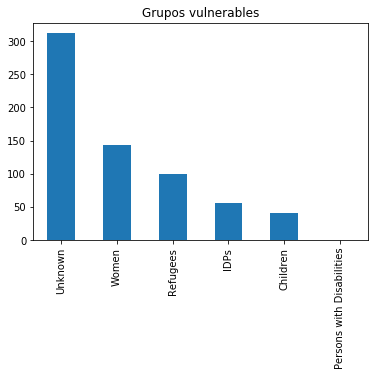

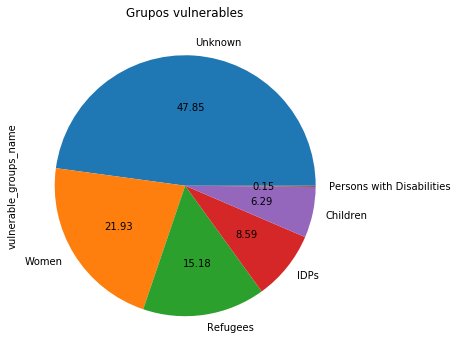

In [51]:
#Tablas de frecuencia grupos vulnerables
#=======================================

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print ('TABLA DE FRECUENCIAS: GRUPOS VULNERABLES')
print ('=========================================')
print(pd.value_counts(desastre['vulnerable_groups_name']))

#Grafico de barras
desastre['vulnerable_groups_name'].value_counts().plot(kind='bar',title='Grupos vulnerables')
plt.show()

#Gráfico de tarta
plot = desastre['vulnerable_groups_name'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Grupos vulnerables')


Observamos que en los grupos vulnerables, existe un mayor número de **mujeres**, seguido por **refugiados**.
Casi la mitad de los registros no tienen información al respecto.

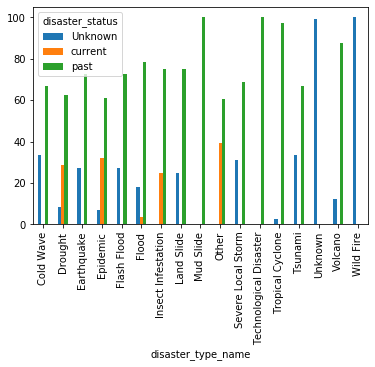

In [53]:
#Gráfico de desastres según estado
#=================================
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html
plot = pd.crosstab(index=desastre['disaster_type_name'],
            columns=desastre['disaster_status']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Con respecto a los desastres contenidos en nuestro dataset, el gráfico muestra cada tipo e información del estado categorizado. Podemos observar, que actualmente, que fenómenos como **sequía, epidemias, inundaciones y plagas** siguen activos. 

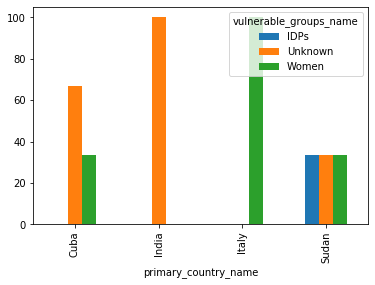

In [95]:
#Gráfico de grupos vulnerables en Italia ,India,Cuba y Sudán
status=['Unknown' 'past' 'current']
desastre.iloc[0,:]
df=desastre.loc[(desastre['primary_country_name']=='Italy')|(desastre['primary_country_name']=='India')|(desastre['primary_country_name']=='Cuba')|(desastre['primary_country_name']=='Sudan'),:]
plot = pd.crosstab(index=df['primary_country_name'],
            columns=df['vulnerable_groups_name']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')


Para los paises elegidos, hemos representado el tipo de grupos vulnerables que existen. Encontramos que **Sudán, tiene un tipo de población en riesgo más diversa** y por lo tanto con características distintas que atender. Es importante saberlo para futuras acciones de prevención.

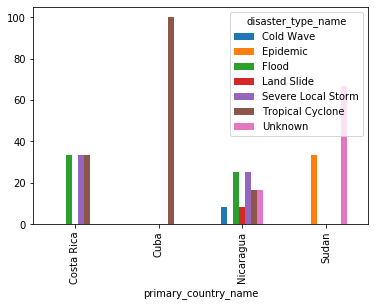

In [97]:
#Gráfico de tipos de desastre por paises
status=['Unknown' 'past' 'current']
desastre.iloc[0,:]
df=desastre.loc[(desastre['primary_country_name']=='Costa Rica')|(desastre['primary_country_name']=='Nicaragua')|(desastre['primary_country_name']=='Cuba')|(desastre['primary_country_name']=='Sudan'),:]
plot = pd.crosstab(index=df['primary_country_name'],
            columns=df['disaster_type_name']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

Para los paises elegidos, encontramos que en **Nicaragua** exiten más registros de desastres distintos como **ola de calor, inundaciones, Corrimientos de tierra, Tormentas y ciclones**. Sin embargo en **Cuba** solo tenemos registros de Ciclones. Cada uno con características distintas si queremos llevar a cabo planes de prevención.